# CS457 Assignment 2 - Question 2

### Student Name: Huda Feroz Ahmed
### Student ID: 04081
### Student Email: ha04081@st.habib.edu.pk

## Question 1: Google Play Store apps and reviews
<p>Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.</p>
<p><img style="width:50%" src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>
<p>Let's take a look at the data, which consists of two files:</p>
<ul>
<li><code>apps.csv</code>: contains all the details of the applications on Google Play. There are 13 features that describe a given app.</li>
<li><code>user_reviews.csv</code>: contains 100 reviews for each app, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">most helpful first</a>. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.</li>
</ul>

## 1. Import Data

In [1]:
# Read in dataset
import pandas as pd
import numpy as np

df = pd.read_csv('apps.csv')

# Drop duplicates
apps = df.drop_duplicates()
apps = df.drop('Unnamed: 0', axis = 1) #removing unnamed col

# Print the total number of apps
print('Total number of apps in the dataset = ',apps.shape[0])

# Print random sample of 5 entries
print(apps.sample(5))

Total number of apps in the dataset =  9659
                                                   App            Category  \
1984                                       Fever Meter             MEDICAL   
9598    Modern Counter 3: FPS Multiplayers battlegro 3              FAMILY   
2991                                       РИА Новости  NEWS_AND_MAGAZINES   
5151                                    BG TV Stations              FAMILY   
2027  SPARK - Live random video chat & meet new people              SOCIAL   

      Rating  Reviews   Size    Installs  Type Price Content Rating  \
1984     3.6       26  0.975      5,000+  Free     0       Everyone   
9598     4.1       17    50M      1,000+  Free     0       Everyone   
2991     4.5    44274   8.0M  1,000,000+  Free     0       Everyone   
5151     NaN        0   2.9M        100+  Free     0       Everyone   
2027     4.6    79658    17M  5,000,000+  Free     0     Mature 17+   

                Genres       Last Updated Current Ver Androi

Analysis: There are 9659 apps in our data even after removing duplicates i.e. there are no duplicates in data.

## 2. Data cleaning
<p>The three features that we will be working with most frequently henceforth are <code>Installs</code>, <code>Size</code>, and <code>Price</code>. A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later. Specifically, the presence of special characters (<code>, $ +</code>) and letters (<code>M k</code>) in the <code>Installs</code>, <code>Size</code>, and <code>Price</code> columns. Also it make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.</p>

In [2]:
chars_to_remove = [',', '$', '+', 'M', 'k']
cols_to_clean = ['Installs', 'Size', 'Price']


# Loop for each column and characters
def cleaning_data(val):
    if type(val) != str:
        return val
    for i in chars_to_remove:
        val = val.replace(i, '')
    return val

for i in cols_to_clean:
    apps[i] = apps[i].map(cleaning_data)
    
# Convert cols to numeric
for i in cols_to_clean:
    apps[i] = pd.to_numeric(apps[i])

## 3. Exploring app categories
<p>With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.</p>
<p>This brings us to the following questions:</p>
<ul>
<li>Which category has the highest share of (active) apps in the market? </li>
<li>Is any specific category dominating the market?</li>
<li>Which categories have the fewest number of apps?</li>
</ul>

In [3]:
#import your favourite library for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Print the total number of unique categories
num_categories = apps['Category'].nunique()
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them for easier plotting
cat_count = apps['Category'].value_counts(sort = True)

# Plot any graph (bar,chart,line etc.) to show each category and its count for visualization
cat_count.plot(kind='barh',figsize=(20,15))
plt.show()

Number of categories =  33


<Figure size 2000x1500 with 1 Axes>

Analysis:
<ul>
<li>Family category has the highest share of (active) apps in the market. </li>
<li>Family, games and tools categories are dominating the market</li>
<li>Beauty, comics, parenting, events, and art anf design categories have the fewest number of apps</li>
</ul>

## 4. Distribution of app ratings
<p>After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.</p>
<p>Add Histogram plot to visualize the distribution of app ratings</p>

Average app rating =  4.173243045387998


Text(0, 0.5, 'Number of Apps')

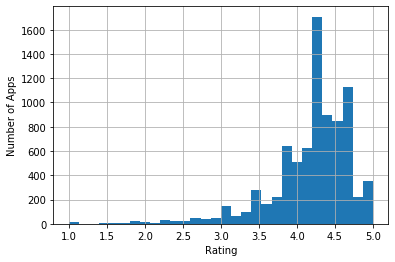

In [4]:
apps['Size'] = pd.to_numeric(apps['Size'], errors='coerce') #changing data types for plotting
apps['Rating'] = pd.to_numeric(apps['Rating'], errors='coerce')
apps['Installs'] = pd.to_numeric(apps['Installs'], errors='coerce')
apps['Price'] = pd.to_numeric(apps['Price'], errors='coerce')

# Overall Average rating of apps
avg_app_rating = np.mean(apps['Rating'])
print('Average app rating = ', avg_app_rating)

fig, ax = plt.subplots()

# Distribution of apps according to their ratings using histogram. Write proper x axis and y axis labels.
apps['Rating'].hist(bins = 30)

ax.set_xlabel("Rating")
ax.set_ylabel("Number of Apps")

Analysis: The distribution of apps according to their ratings is normal, with most apps having a rating of 4.2 to 4.5.

## 5. Size and price of an app
<p>Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.</p>
<p>How can we effectively come up with strategies to size and price our app?</p>
<ul>
<li>Does the size of an app affect its rating? </li>
<li>Do users really care about system-heavy apps or do they prefer light-weighted apps? </li>
<li>Does the price of an app affect its rating? </li>
<li>Do users always prefer free/cheaper apps over paid apps? What price range do majoriy of apps fall into?</li>
</ul>

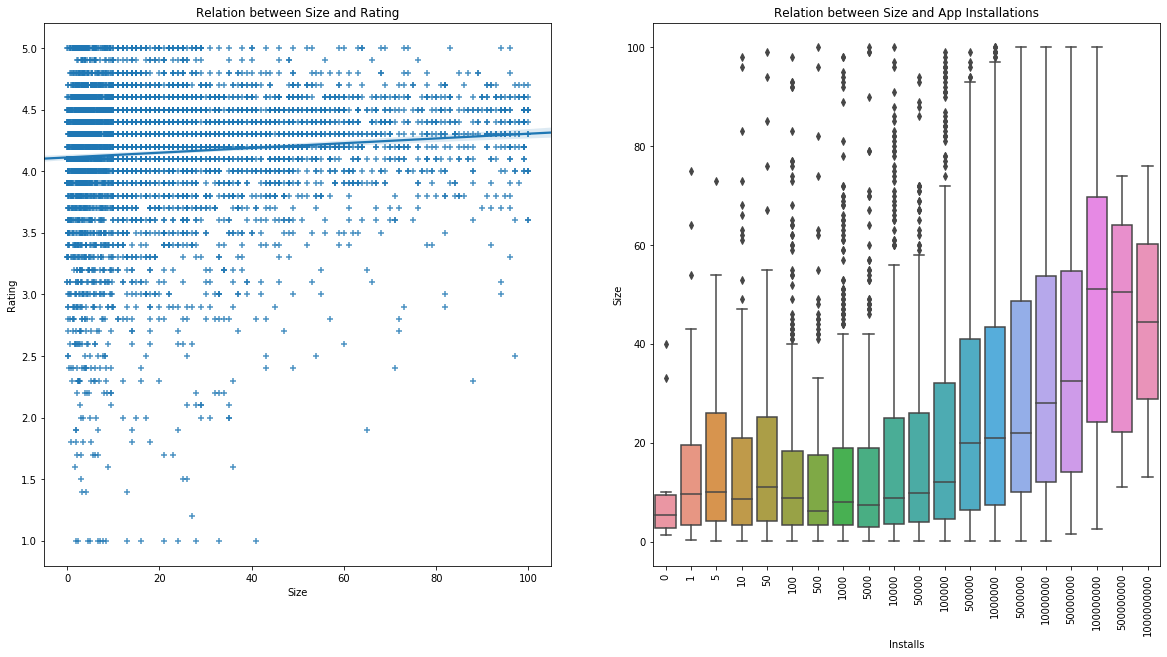

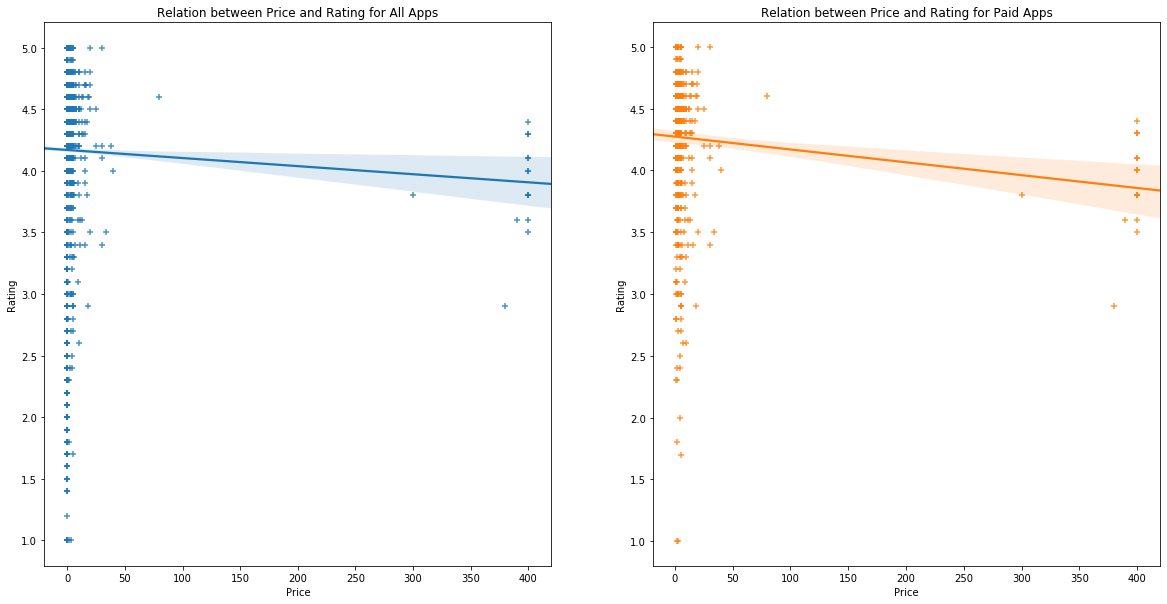

In [5]:
# Get the subset for categories with at least 250 apps
cat_subset = apps[apps['Category'].isin(cat_count.index[cat_count > 250])]

# Plot size vs. rating
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
sns.regplot(data=cat_subset, x="Size", y="Rating", marker="+", ax=ax[0])
sns.boxplot(data=cat_subset, y="Size", x="Installs", ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[0].set_title("Relation between Size and Rating")
ax[1].set_title("Relation between Size and App Installations")
plt.show()

# Subset for paid apps only
paid_apps = apps[apps['Type'] == 'Paid']

# Plot price vs. rating
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
# sns.boxplot(data=paid_apps, x="Price", y="Rating", ax=ax[0])
sns.regplot(data=cat_subset, x="Price", y="Rating", marker="+", ax=ax[0])
sns.regplot(data=paid_apps, x="Price", y="Rating", marker="+", ax=ax[1])
ax[0].set_title("Relation between Price and Rating for All Apps")
ax[1].set_title("Relation between Price and Rating for Paid Apps")
plt.show()

<li> The size of an app does not have a clear and substantial relation with Rating </li>
<li>users do not care about app size </li>
<li>Price does have an impact on rating </li>
<li>users usually prefers free/cheaper apps over paid apps. The price range in whiich apps mostly fall are 0 to 10. </li>

## 6. Relation between app category and app price
<p>So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.</p>
<p>There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.</p>
<p>Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients.
<ul>
<li>What is the maximum price for GAME category. What is the average price of paid GAME category? </li>
<ul>

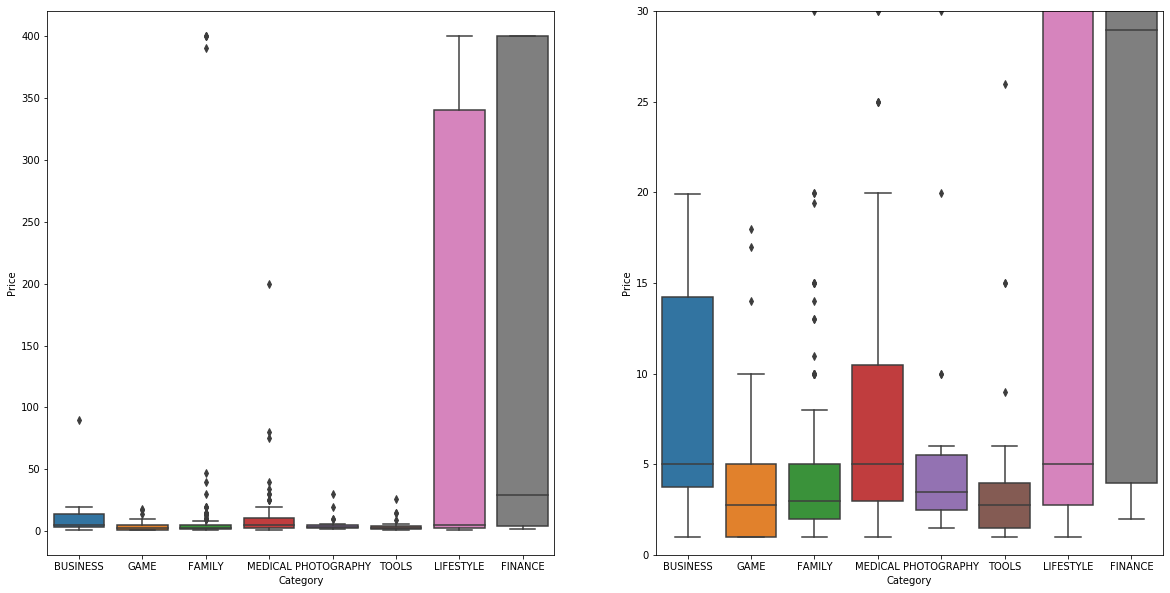

count    82.000000
mean      3.467195
std       3.242659
min       0.990000
25%       0.990000
50%       2.740000
75%       4.990000
max      17.990000
Name: Price, dtype: float64

In [34]:
# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]
# print(popular_app_cats['Price']!=0)
# Examine and plot the price trend for the above categories
paid_popular = popular_app_cats[popular_app_cats['Type'] == 'Paid']

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
sns.boxplot(data = paid_popular, x = "Category", y = "Price", ax=ax[0])
sns.boxplot(data = paid_popular, x = "Category", y = "Price", ax=ax[1])
ax[1].set_ylim((0, 30))
plt.show()

# Examine GAME Category. What is the maximum price for GAME category. What is the average price of paid GAME category?

paid_apps[paid_apps['Category'] == "GAME"]["Price"].describe()

Analysis: the price of lifestyle and finance apps is much more than other apps, while the mean price of finance apps is the highest.

## 7. Filter out "junk" apps
<p>It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called <em>I Am Rich Premium</em> or <em>most expensive app (H)</em> just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.</p>
<p>Let's filter out these junk apps and re-do our visualization.

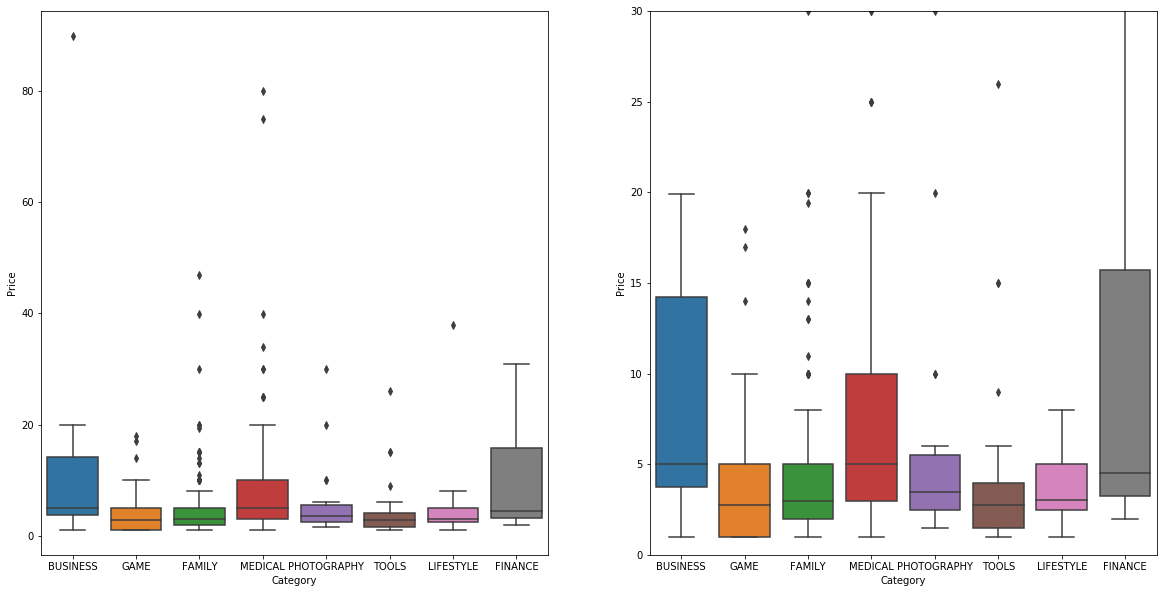

In [38]:
# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]
paid_popular = popular_app_cats[popular_app_cats['Type'] == 'Paid']

# Category, Name and Price of apps priced above $100 which will be considered as Junk apps.
junk_apps = paid_popular[paid_popular['Price'] > 100]

# Select apps priced below $100 which will be considered as authentic apps.
authentic_apps = paid_popular[paid_popular['Price'] <= 100]

# Examine and visualize price vs category with the authentic apps. You can use box plot
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
sns.boxplot(data = authentic_apps, x = "Category", y = "Price", ax=ax[0])
sns.boxplot(data = authentic_apps, x = "Category", y = "Price", ax=ax[1])
ax[1].set_ylim((0, 30))
plt.show()

Analysis: after removing junk apps, lifestyle apps do not have the highest price and mean of finance apps also decreased. Business and finance apps are most priced with a mean close to medical apps. 

## 8. Popularity of paid apps vs free apps
<p>For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:</p>
<ul>
<li>Free to download.</li>
<li>Main source of income often comes from advertisements.</li>
<li>Often created by companies that have other products and the app serves as an extension of those products.</li>
<li>Can serve as a tool for customer retention, communication, and customer service.</li>
</ul>
<p>Some characteristics of paid apps are:</p>
<ul>
<li>Users are asked to pay once for the app to download and use it.</li>
<li>The user can't really get a feel for the app before buying it.</li>
</ul>
<p>Are paid apps are installed as much as free apps?

C:\Users\Huda\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


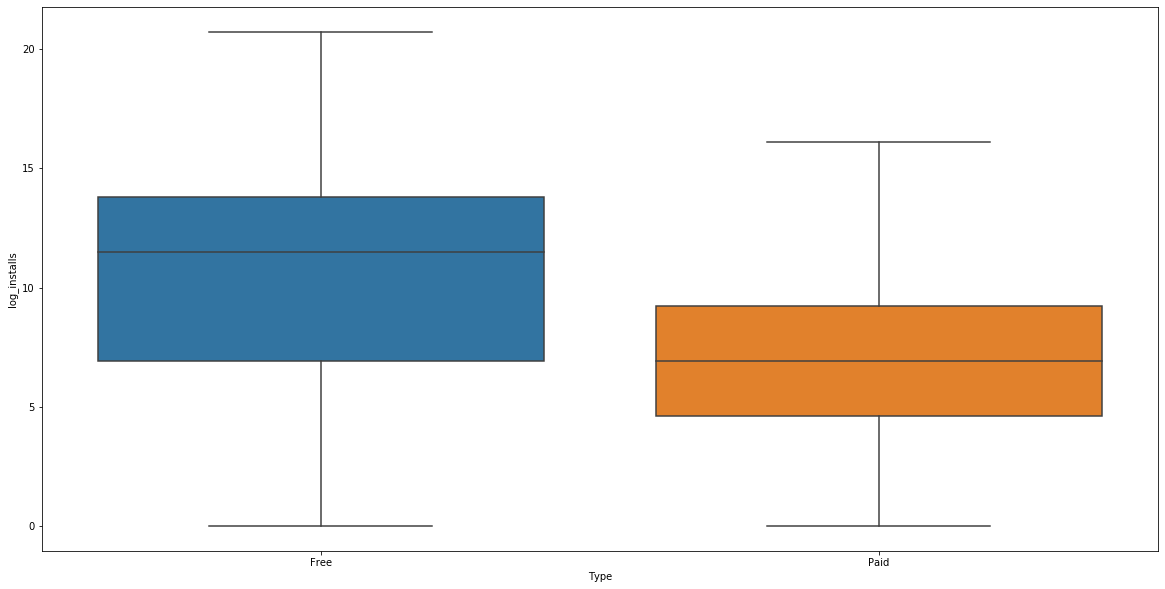

In [40]:
# Visualize Number of downloads of paid apps vs. free apps. Hint (convert number of downloads to log in order to scale down actual value)
# Box plot is preferred.
fig, ax = plt.subplots(figsize = (20,10))
apps['log_installs'] = np.log(apps['Installs'])
sns.boxplot(data = apps, x = 'Type', y = 'log_installs')

Analysis: Free apps are installed more than paid apps

## 9. Sentiment analysis of user reviews
<p>Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.</p>
<p>Sentiment polarity defines sentiment with a range from +1 to -1 (+1 being positive, -1 being negative and 0 being neutral)</p>
<p>What is the sentiment trend of user reviews for paid and free apps?</p>


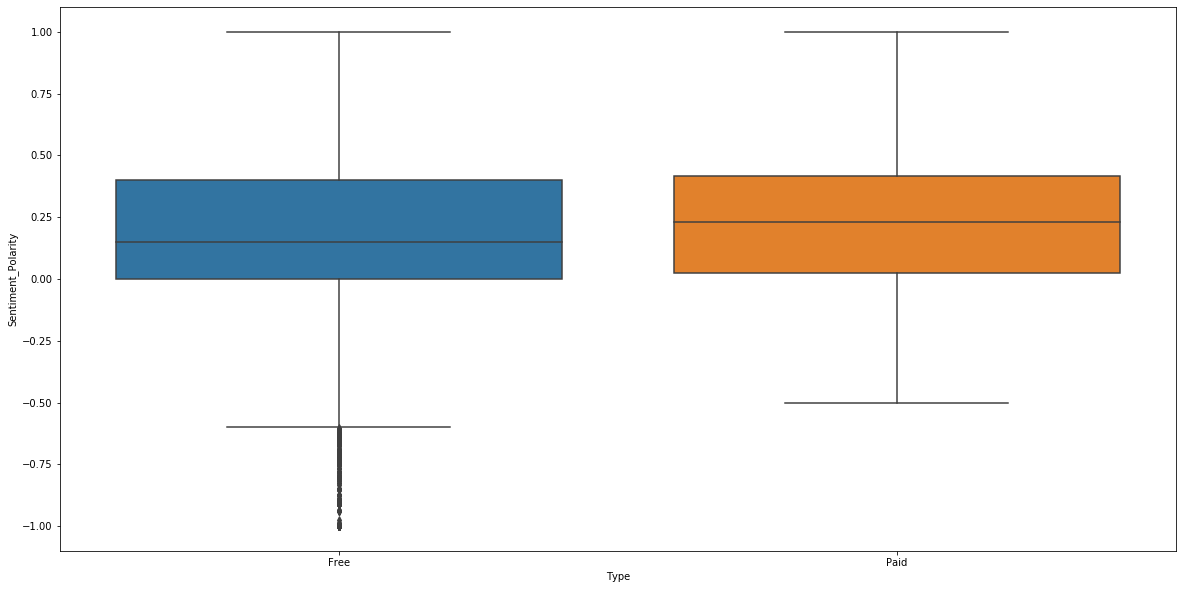

In [42]:
# Load user_reviews.csv
ur = pd.read_csv('user_reviews.csv')
# Join and merge the two dataframe apps and user_reviews. Drop NA values from Sentiment and Translated_Review columns
jm = pd.merge(apps, ur, on = 'App')
jm = jm.dropna(subset = ['Sentiment', 'Translated_Review'])

# Visualize user review sentiment polarity for paid vs. free apps. Hint (use Box plot for better visualization and analysis)
fig, ax = plt.subplots(figsize = (20,10))
sns.boxplot(data = jm, x = 'Type', y = 'Sentiment_Polarity')

Anaylsis: Free apps have negatively sentiment polarity outliers and a slightly lower mean than paid apps, but overall there is not a great difference in Sentiment polarity of paid and free apps. 